In [184]:
import numpy as np
import matplotlib.pyplot as plt

In [185]:
def f_x(x):
    return np.log(x)*x

In [186]:
a = 1
b = 2
m = 100
h = (b-a)/m

a_b = np.linspace(a,b,m)

In [187]:
# Метод прямоугольников
def rectangle(a_b, N, m):
    h = (b-a)/N 
    f_left = [0]*len(a_b)

    for i in range(len(a_b) - 1):
        f_left[i] = f_x(a_b[i])

    f_left[len(a_b) - 1] = f_x(a_b[len(a_b) - 1])

    I_l = f_left[0] * h

    for j in range(1, len(a_b)):
        I_l += (f_left[j-1]*h)
    return I_l

In [188]:
# Зависимость от шага сетки:
#g = [10, 30, 50, 80, 100, 150, 200, 300, 400, 500, 700, 1000, 2000, 4000, 5000, 10000, 100000]
g = np.linspace(10,100,10)
g_res_1 = []
for i in range(len(g)):
    g_res_1.append(rectangle(a_b,g[i], m))

In [189]:
# Метод трапеций
def trapezoid(a_b, N, m):
    h = (b-a)/N
    
    f_tr = [0]*len(a_b)

    for i in range(len(a_b)):
        f_tr[i] = f_x(a_b[i])

    I_tr = 0

    for j in range(len(a_b) - 1):
        I_tr += (f_tr[j] + f_tr[j+1])*(h/2)
    return I_tr

In [190]:
g_res_2 = []
for i in range(len(g)):
    g_res_2.append(trapezoid(a_b, g[i], m))

In [191]:
#Метод Симпсона
def Simps(a_b, N, m):
    h = (a-b)/N
    
    f_s = [0]*len(a_b)

    for i in range(len(a_b)):
        f_s[i] = f_x(a_b[i])

    I_s = 0

    for j in range(0, len(a_b) - 1, 2):
        I_s +=(-1)*(h/3)*(f_s[j-1] + 4*f_s[j] + f_s[j+1])
    return I_s

In [192]:
g_res_3 = []
for i in range(len(g)):
    g_res_3.append(Simps(a_b,g[i], m))

In [193]:
I = [0.63629436111989]*len(g)

In [194]:
R_rec = []
R_trap = []
R_simp = []
for j in range(len(g)):
    R_rec.append(np.log((I[j]-g_res_1[j])))
    R_trap.append(np.log((I[j]-g_res_2[j])))
    R_simp.append(np.log((I[j]-g_res_3[j])))
g_1 = [np.log(x) for x in g]

C:\Users\Никита\AppData\Local\Temp\ipykernel_3816\3329111990.py:5: RuntimeWarning: invalid value encountered in log
  R_rec.append(np.log((I[j]-g_res_1[j])))
C:\Users\Никита\AppData\Local\Temp\ipykernel_3816\3329111990.py:6: RuntimeWarning: invalid value encountered in log
  R_trap.append(np.log((I[j]-g_res_2[j])))
C:\Users\Никита\AppData\Local\Temp\ipykernel_3816\3329111990.py:7: RuntimeWarning: invalid value encountered in log
  R_simp.append(np.log((I[j]-g_res_3[j])))


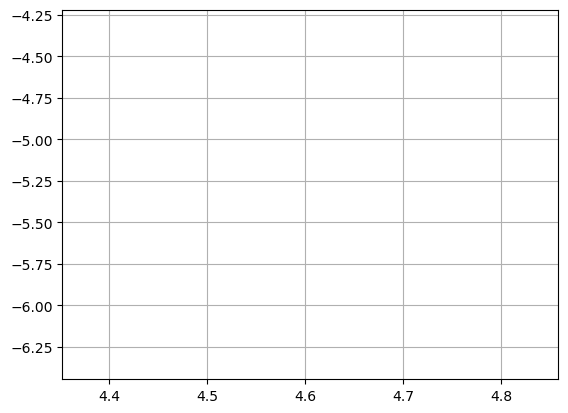

In [195]:
plt.grid(visible=True) 
plt.plot(g_1, R_rec, color = 'blue')
plt.plot(g_1, R_trap, color = 'green')
plt.plot(g_1, R_simp, 'orange');